In [ ]:

##Importing all necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

# Plant Generation Data
df_gen = pd.read_csv('Plant_2_Generation_Data.csv')

# Plant Weather Data
df_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [ ]:

#Dropping PLANT_ID
df_gen.drop('PLANT_ID', axis=1, inplace=True)
df_weather.drop('PLANT_ID', axis = 1, inplace=True)

## Mapping
Inverter_labels = {inverter_no:inverter_name for inverter_name,inverter_no in enumerate(df_gen['SOURCE_KEY'].unique(),1)}
df_gen['Inverter_No'] = df_gen['SOURCE_KEY'].map(Inverter_labels)

## Drop Source Key after replacing with inverter numbers
df_gen.drop('SOURCE_KEY',axis=1,inplace=True)
df_weather.drop('SOURCE_KEY',axis=1,inplace=True)
#Reordering and dropping Daily yield and Total yield
df_gen = df_gen[['DATE_TIME','Inverter_No' ,'DC_POWER', 'AC_POWER']]

In [ ]:
print('Inverter {} has data for {} timestamps(Minimum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmin()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))
print('Inverter {} has data for {} timestamps(Maximum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmax()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().max()))
print('DIFFERENCE = {}'.format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().max() -
                               df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))

Inverter 5 has data for 2355 timestamps(Minimum)
Inverter 2 has data for 3259 timestamps(Maximum)
DIFFERENCE = 904


In [ ]:
from functools import reduce

grouped = df_gen.groupby('Inverter_No')

## Making a list of each Inverter group
dfs = list()
for i, (inverter_no, group) in enumerate(grouped):
    group = group.copy()
    # Rename the columns except 'DATE_TIME'
    for col in group.columns:
        if col != 'DATE_TIME':
            group.rename(columns={col: f'{col}_{inverter_no}'}, inplace=True)
    dfs.append(group)

## Merging data inverterwise using 'reduce'
df_new = reduce(lambda left, right: pd.merge(left, right, on='DATE_TIME', how='outer'), dfs)

# Display the DataFrame
display(df_new)
#Rename columns
df_new.columns = ['DATE_TIME',
        'DC_POWER_1', 'AC_POWER_1',
        'Inverter_No_1', 'DC_POWER_2', 'AC_POWER_2',
        'Inverter_No_2', 'DC_POWER_3', 'AC_POWER_3',
        'Inverter_No_3', 'DC_POWER_4', 'AC_POWER_4',
        'Inverter_No_4', 'DC_POWER_5', 'AC_POWER_5',
        'Inverter_No_5', 'DC_POWER_6', 'AC_POWER_6',
        'Inverter_No_6', 'DC_POWER_7', 'AC_POWER_7',
        'Inverter_No_7', 'DC_POWER_8', 'AC_POWER_8',
        'Inverter_No_8', 'DC_POWER_9', 'AC_POWER_9',
        'Inverter_No_9', 'DC_POWER_10', 'AC_POWER_10',
        'Inverter_No_10', 'DC_POWER_11', 'AC_POWER_11',
        'Inverter_No_11', 'DC_POWER_12', 'AC_POWER_12',
        'Inverter_No_12', 'DC_POWER_13', 'AC_POWER_13',
        'Inverter_No_13', 'DC_POWER_14', 'AC_POWER_14',
        'Inverter_No_14', 'DC_POWER_15', 'AC_POWER_15',
        'Inverter_No_15', 'DC_POWER_16', 'AC_POWER_16',
        'Inverter_No_16', 'DC_POWER_17', 'AC_POWER_17',
        'Inverter_No_17', 'DC_POWER_18', 'AC_POWER_18',
        'Inverter_No_18', 'DC_POWER_19', 'AC_POWER_19',
        'Inverter_No_19', 'DC_POWER_20', 'AC_POWER_20',
        'Inverter_No_20', 'DC_POWER_21', 'AC_POWER_21',
        'Inverter_No_21', 'DC_POWER_22', 'AC_POWER_22',
        'Inverter_No_22']

,DATE_TIME,Inverter_No_1,DC_POWER_1,AC_POWER_1,Inverter_No_2,DC_POWER_2,AC_POWER_2,Inverter_No_3,DC_POWER_3,AC_POWER_3,...,AC_POWER_19,Inverter_No_20,DC_POWER_20,AC_POWER_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,Inverter_No_22,DC_POWER_22,AC_POWER_22
0,2020-05-15 00:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
1,2020-05-15 00:15:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
2,2020-05-15 00:30:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
3,2020-05-15 00:45:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
4,2020-05-15 01:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2020-05-20 13:00:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1179.653333,20,1299.906667,1267.406667,NaN,NaN,NaN,22,0.0,0.0
3255,2020-05-20 13:15:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1173.713333,20,1286.700000,1254.526667,NaN,NaN,NaN,22,0.0,0.0
3256,2020-05-20 13:30:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1116.450000,20,1224.671429,1194.050000,NaN,NaN,NaN,22,0.0,0.0
3257,2020-05-20 13:45:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1095.706667,20,1200.953333,1170.946667,NaN,NaN,NaN,22,0.0,0.0


In [ ]:
df_weather['DATE_TIME'] = df_weather['DATE_TIME'].astype(str)
df_new['DATE_TIME'] = df_new['DATE_TIME'].astype(str)
#Merging Generation & Weather datasets
df = df_weather.merge(df_new,left_on='DATE_TIME',right_on='DATE_TIME',how='outer')
#Generating 15 min time blocks
tb = pd.date_range('15-05-2020','16-05-2020',freq='15min')
tb=tb[:-1]
ts = tb.strftime('%H:%M')
block_dict = {}
j=1
for i in range(len(ts)):
    block_dict[ts[i]] =  j
    j+=1

# Making new columns of Time,BLOCK and Date and droping DATE_TIME column
df['TIME'] = df['DATE_TIME'].apply(lambda x:str(x)[-8:-3])
df['DATE'] = pd.to_datetime(df['DATE_TIME']).dt.date
df['BLOCK'] = pd.to_datetime(df['TIME']).astype(str).apply(lambda x:block_dict[str(x)[-8:-3]])
df.drop('DATE_TIME',axis=1,inplace=True)
#Saving the dictionary using numpy
np.save('timestamp_block_dictionary.npy',block_dict)

## Column re-ordering
cols = df.columns.tolist()
df = df[[cols[-1]]+[cols[-2]]+[cols[-3]]+cols[:-3]]

display(df)

<ipython-input-5-9f8bfe4b57e4>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['BLOCK'] = pd.to_datetime(df['TIME']).astype(str).apply(lambda x:block_dict[str(x)[-8:-3]])


,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,92,2020-06-17,22:45,23.511703,22.856201,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3255,93,2020-06-17,23:00,23.482282,22.744190,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3256,94,2020-06-17,23:15,23.354743,22.492245,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3257,95,2020-06-17,23:30,23.291048,22.373909,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [ ]:

#Getting last 3 days data
last_3_days = df['DATE'].astype(str).unique()[-3:]
df_test = df[df['DATE'].astype(str).isin(last_3_days)].sort_values(by=['DATE','BLOCK'])
#Saving Test data
df_test.reset_index(drop=True).to_csv('Test_data.csv')
#Saving all as Train for indexes not present in test data
df_train = df[~df.index.isin(df_test.index)]
df_train.to_csv('Train_data.csv')

## Checking shapes
print('Train:',df_train.shape)
print('Test:',df_test.shape)

## Check for missing values
print('No. of missing values in train dataset: ',list(df_train.isnull().sum()))

Train: (2971, 72)
Test: (288, 72)
No. of missing values in train dataset:  [0, 0, 0, 0, 0, 0, 64, 64, 64, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 64, 64, 64, 64, 64, 64, 0, 0, 0, 0, 0, 0, 904, 904, 904, 64, 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 904, 904, 904, 0, 0, 0]


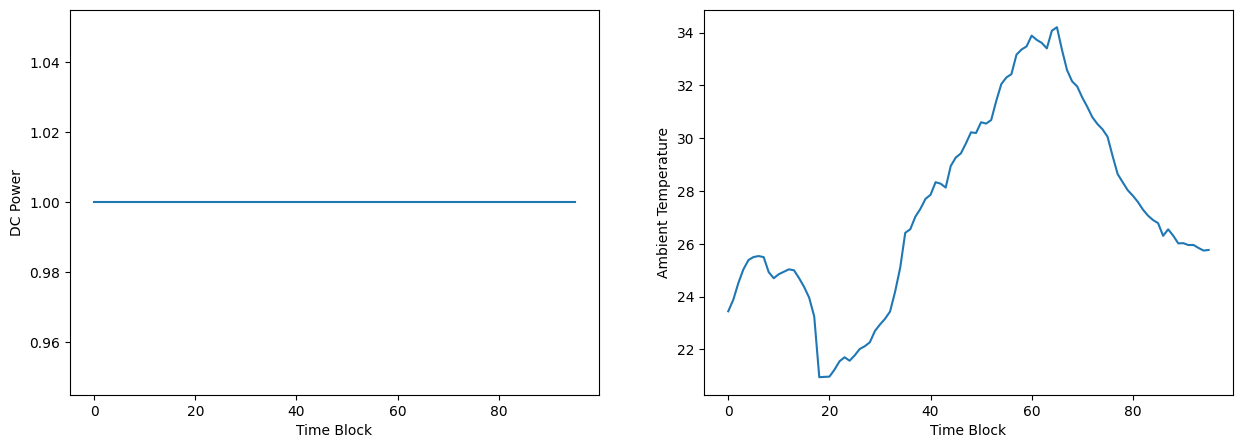

In [ ]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['DC_POWER_1'])
ax2.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['AMBIENT_TEMPERATURE'])
ax1.set_xlabel('Time Block')
ax1.set_ylabel('DC Power')

ax2.set_xlabel('Time Block')
ax2.set_ylabel('Ambient Temperature')

plt.show()

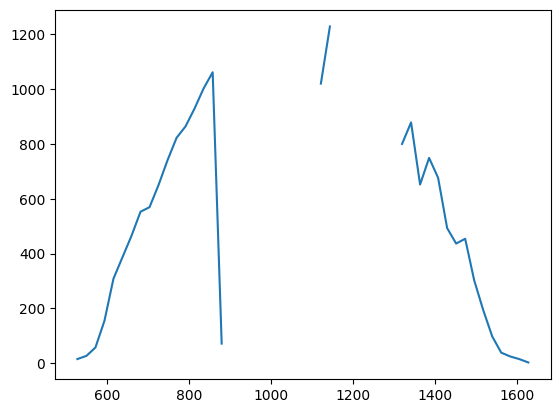

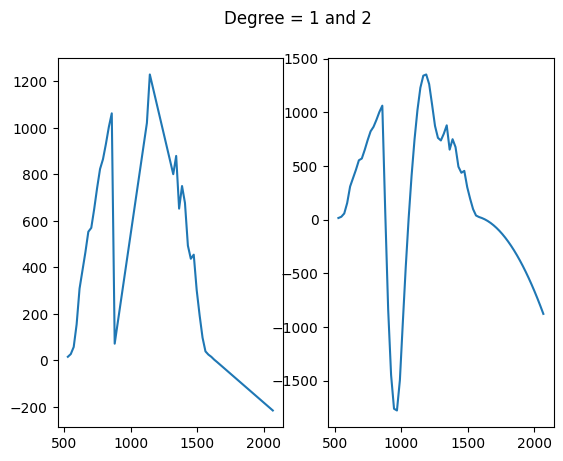

In [ ]:
#Code for Plot 1
df2 = df_gen.copy() # Making a acopy
df2['DATE'] = pd.to_datetime(df_gen['DATE_TIME']).dt.date.astype(str)
## Selecting a date and replacing AC Power with NaN wherever its 0 and plotting
indexes = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')&(df2['AC_POWER']==0)].index
df2.loc[indexes,'AC_POWER']=np.nan
df2 = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')]['AC_POWER']
df2.plot();

#Code for Plot 2
## Comparison between 1 & 2 degree splines
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Degree = 1 and 2')
ax1.plot(df2.interpolate(method='spline',order=1))
ax2.plot(df2.interpolate(method='spline',order=2));

In [ ]:
day_only_columns=list()
#Will collect all names like DC_POWER_1, DC_POWER_2 and so on
DC_cols = [i for i in df.columns if 'DC_POWER' in i]
AC_cols = [i for i in df.columns if 'AC_POWER' in i]
day_only_columns = DC_cols+AC_cols+["IRRADIATION"]

def Data_Preparation_Plant_Level(df):
    for col in day_only_columns:
        df[col] = df[col].astype(float)
        # For time except for non-generating hours(12 am to 6 am & 6 pm to 12 am) will be replaced by zero
        df.loc[df[(~((df['BLOCK']>24) & (df['BLOCK']<73))) & df[col].isnull()].index,col] = 0

    # Left NaN value for generating hours(6 am to 6pm)

        #1.AC & DC columns
    df[DC_cols+AC_cols].interpolate(method='polynomial',order = 2,inplace=True)
       #2.Left NaN values in Irradiation, Ambient Temp, Module Temp, Inverter_No
    df.interpolate(method='linear',inplace=True)

    # Summing up Inverter wise AC and DC values to reach Plant-level generation
    df['AC_POWER'] = df.loc[: ,AC_cols].sum(axis=1)
    df['DC_POWER'] = df.loc[:,DC_cols].sum(axis=1)
    #Scaling generation to MW from kW
    df['AC_POWER'] = df['AC_POWER']/1000
    df['DC_POWER'] = df['DC_POWER']/1000

    return df
#Applying the function on Train & Test
df_train = Data_Preparation_Plant_Level(df_train)
df_test = Data_Preparation_Plant_Level(df_test)

<ipython-input-9-4231667f115f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
<ipython-input-9-4231667f115f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
<ipython-input-9-4231667f115f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

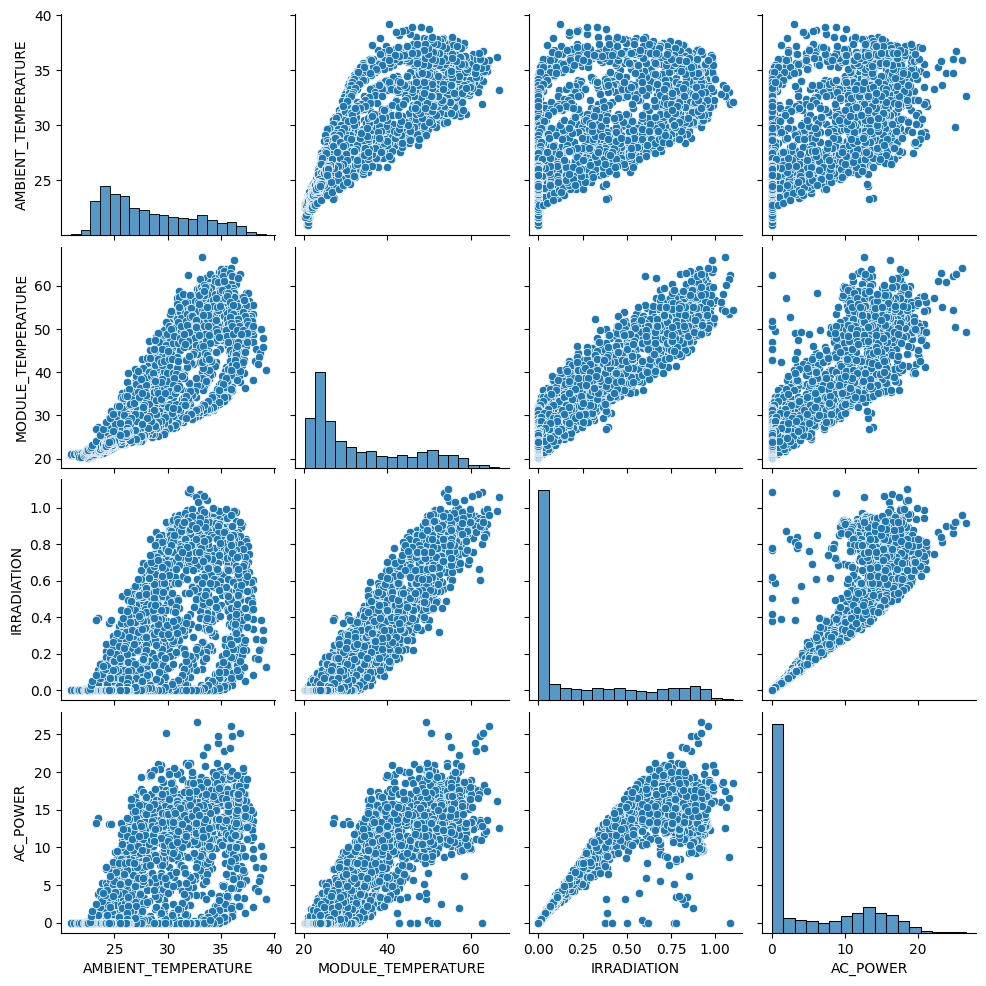

In [ ]:
import seaborn as sns
sns.pairplot(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER']],height=2.5)

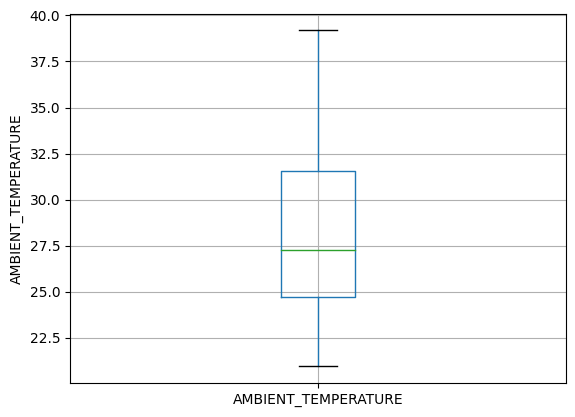

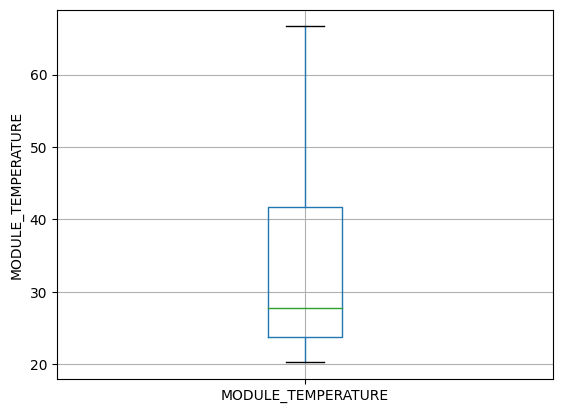

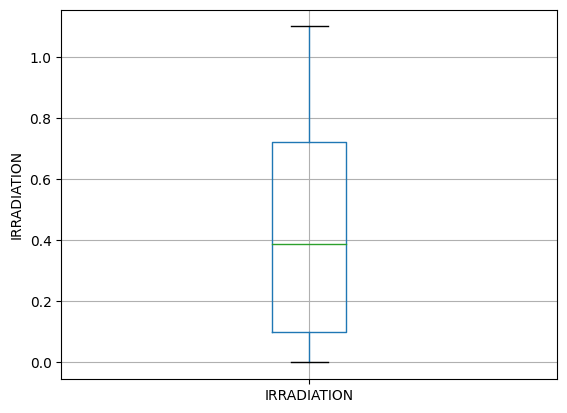

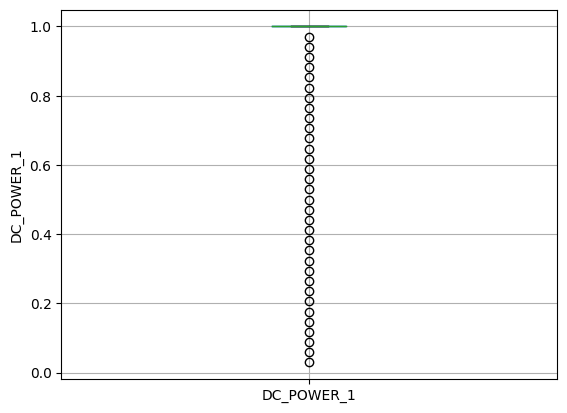

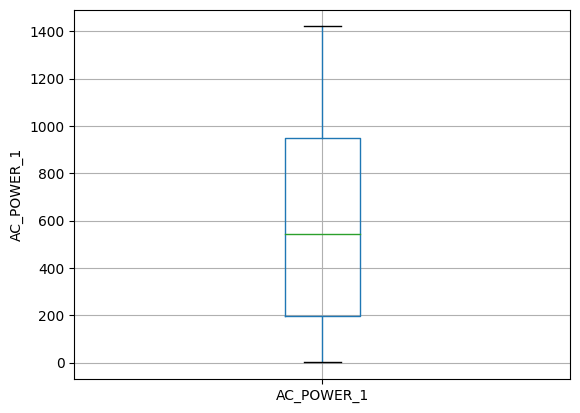

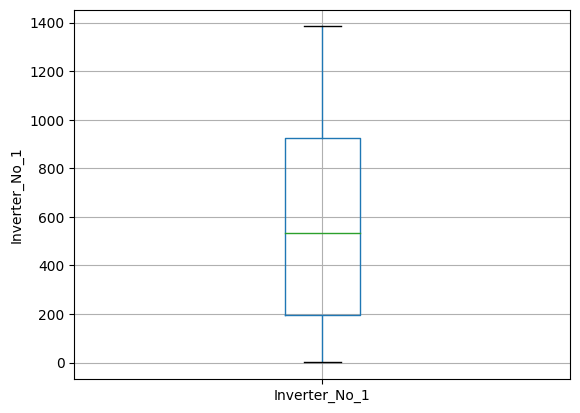

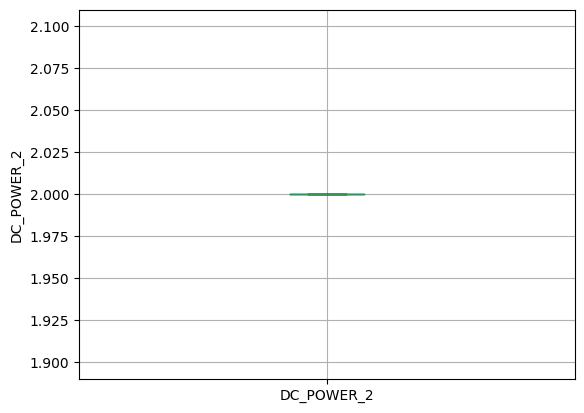

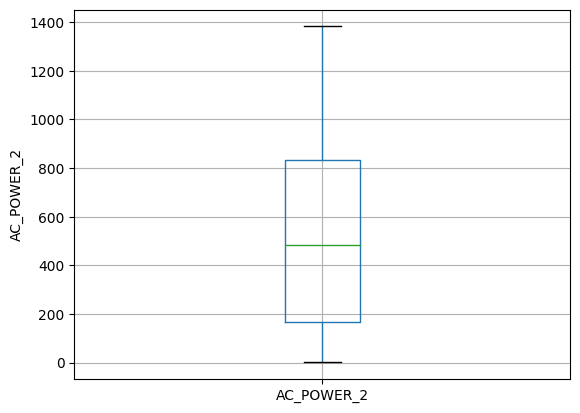

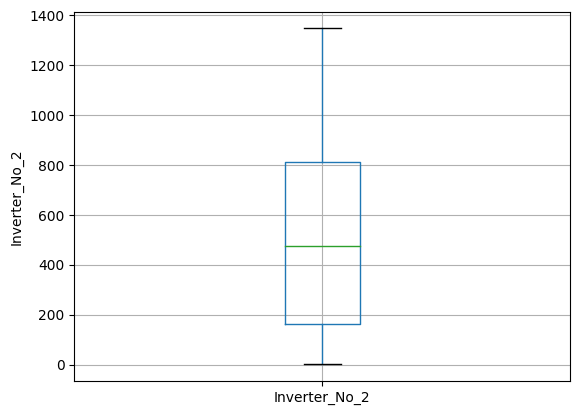

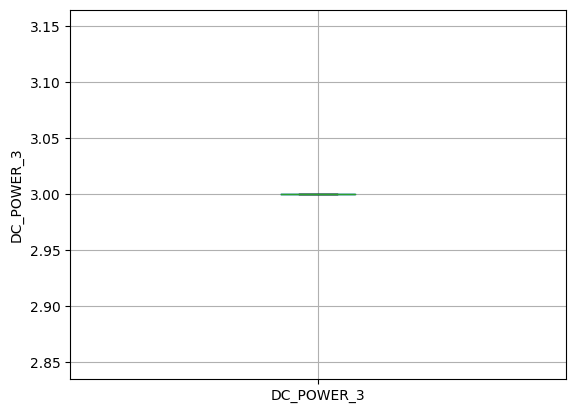

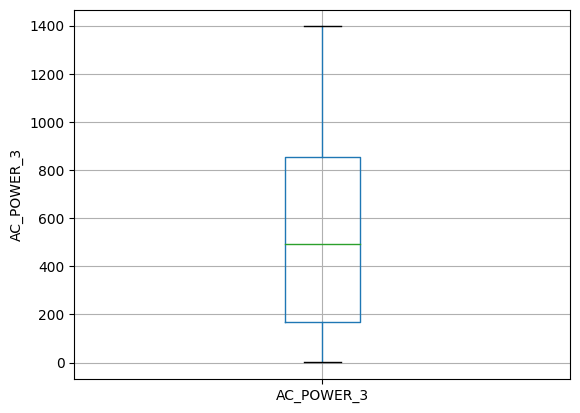

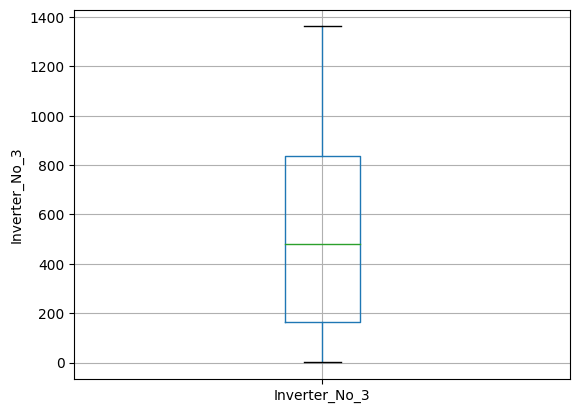

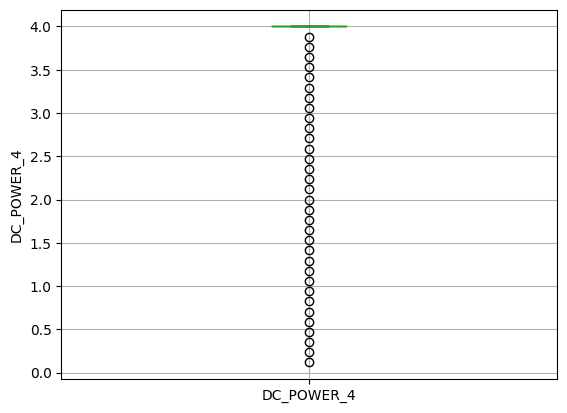

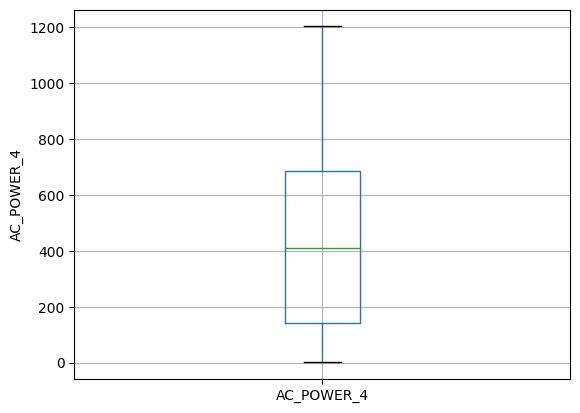

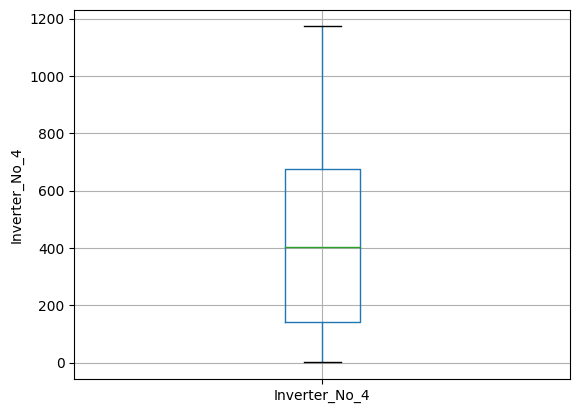

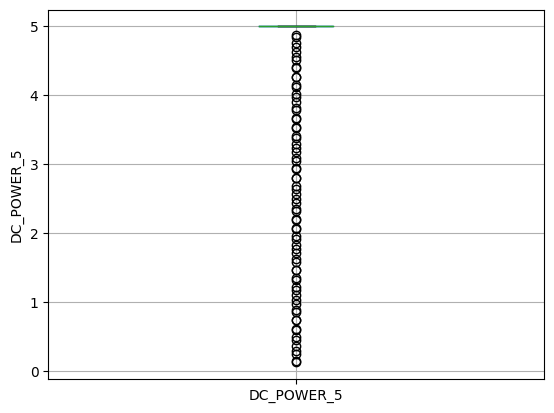

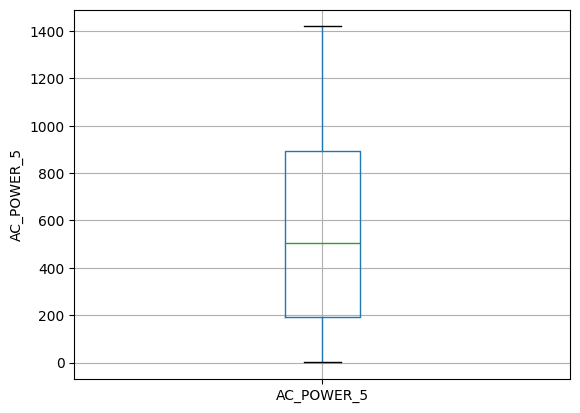

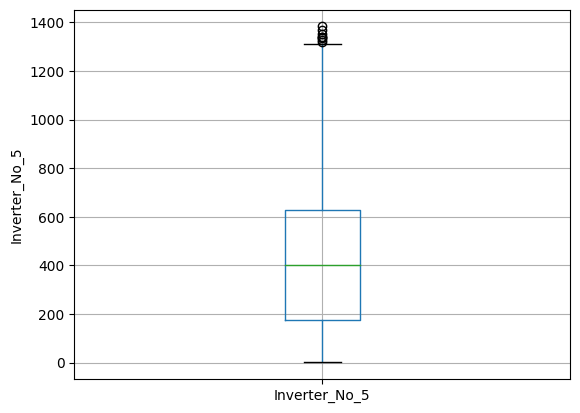

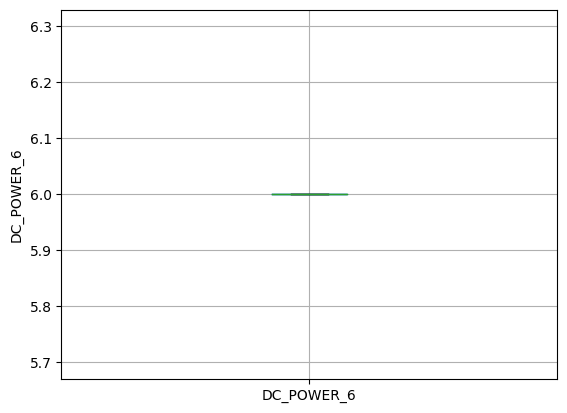

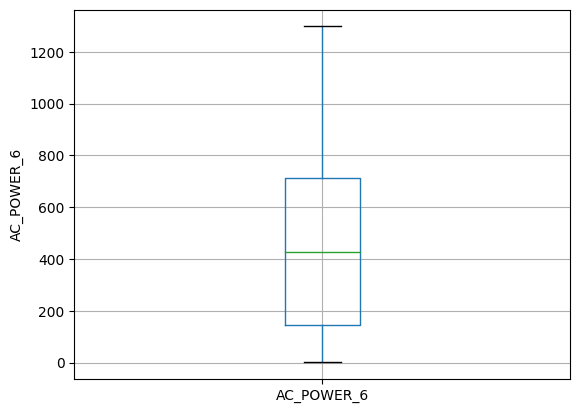

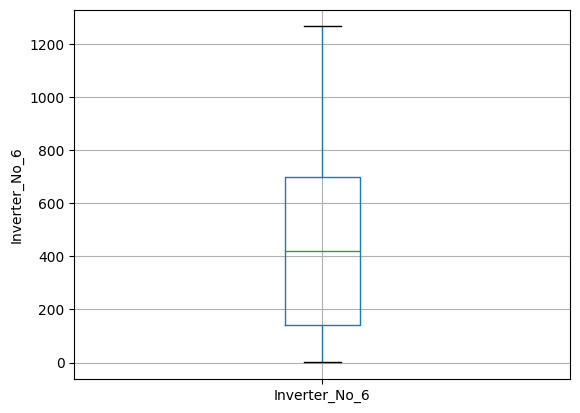

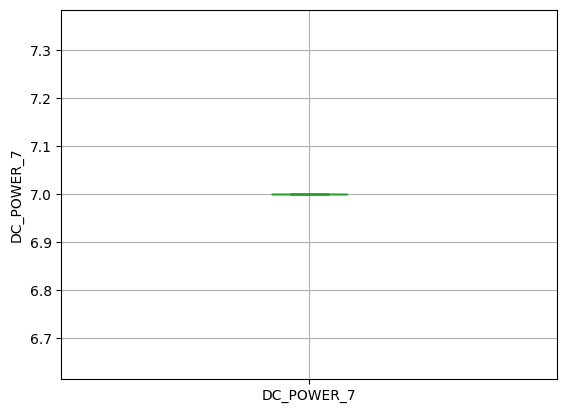

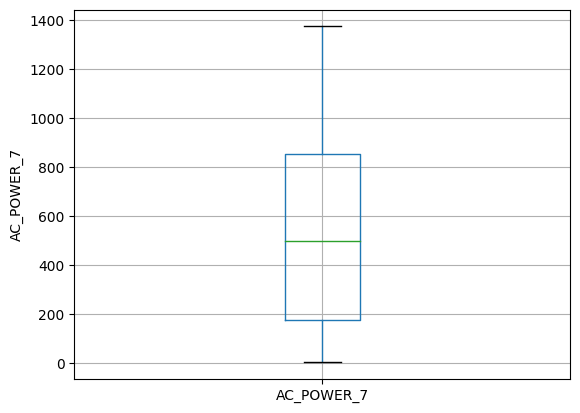

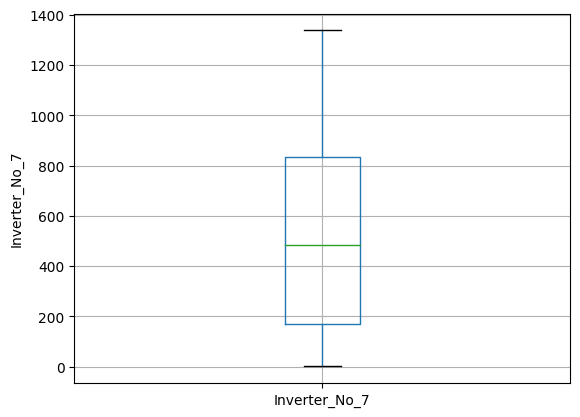

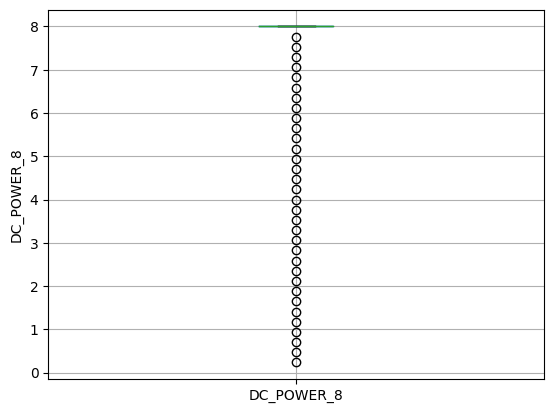

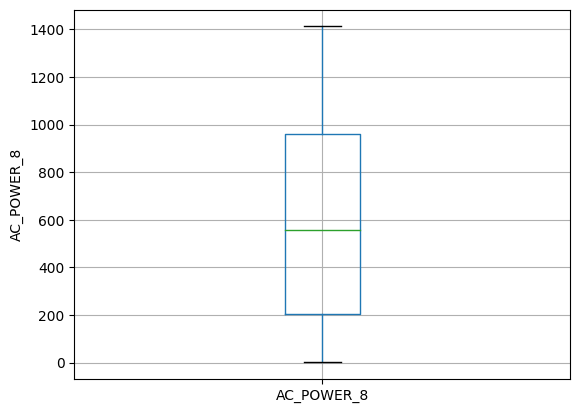

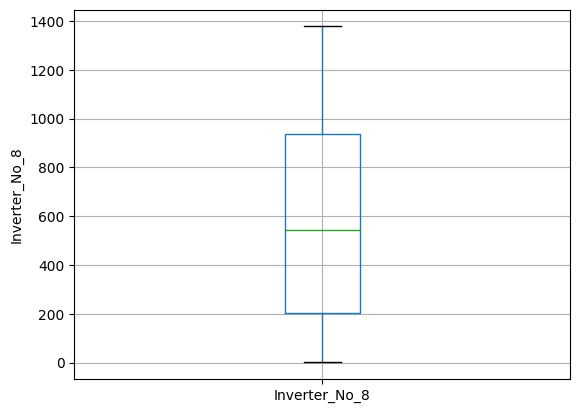

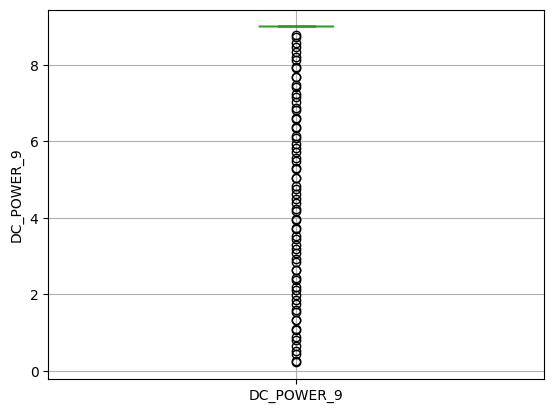

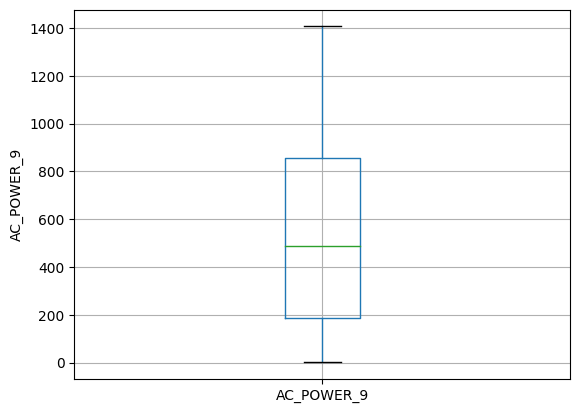

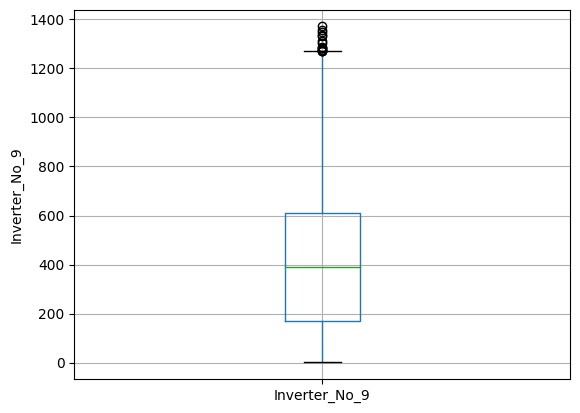

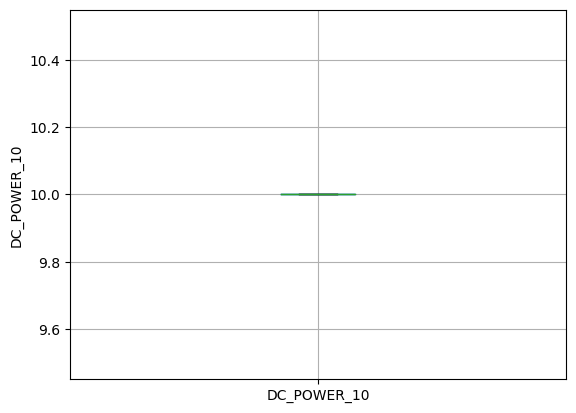

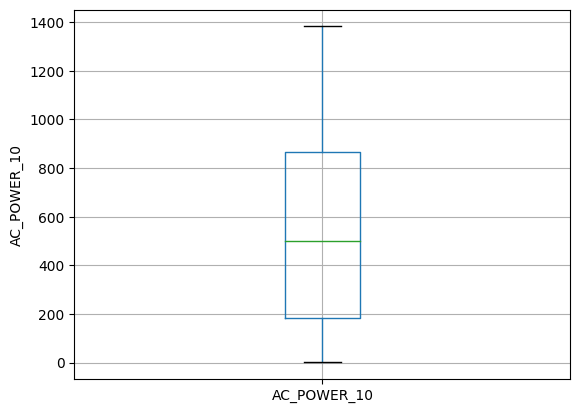

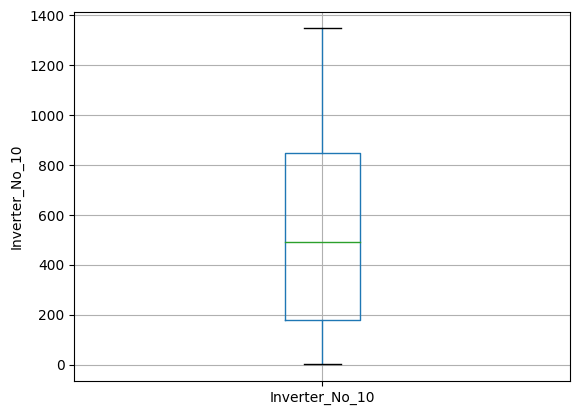

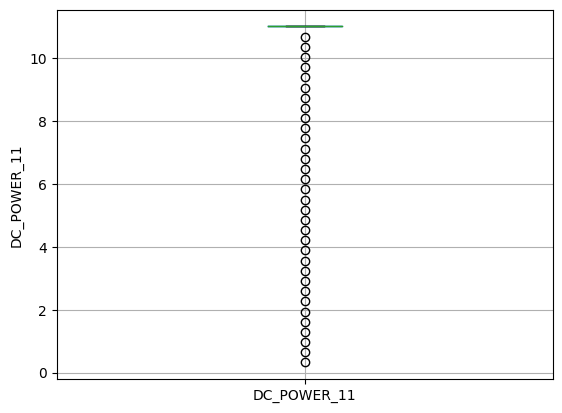

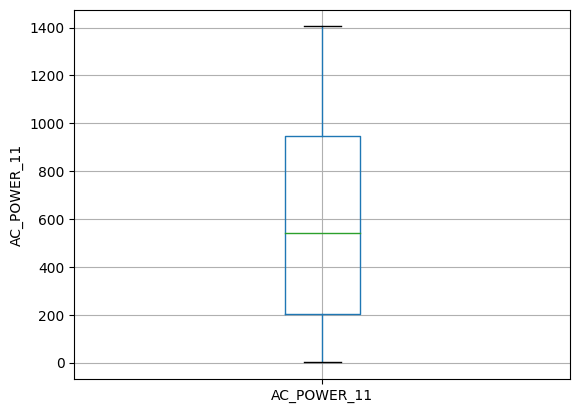

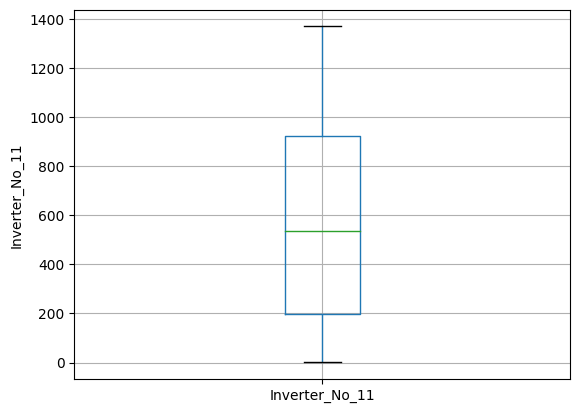

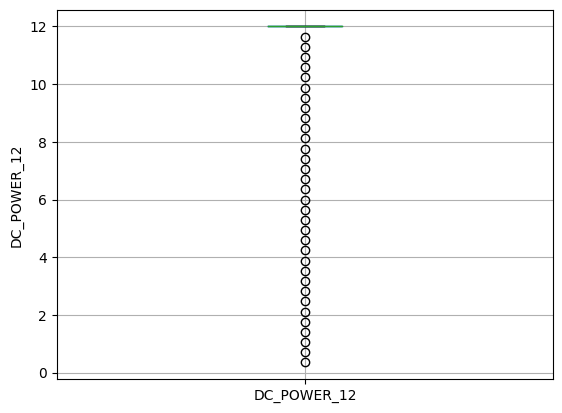

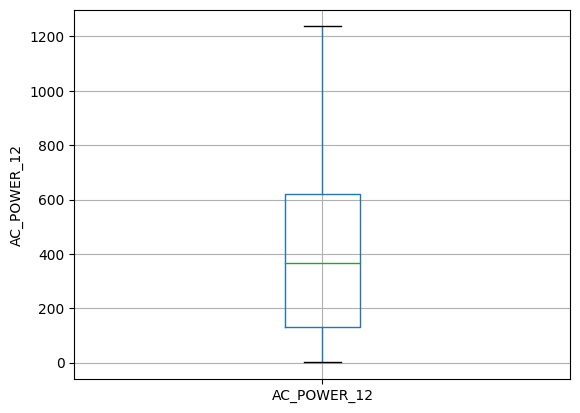

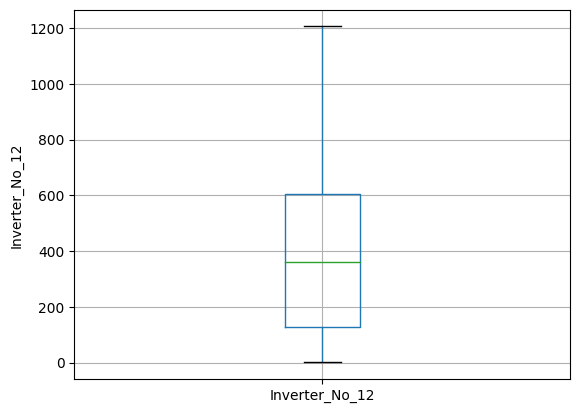

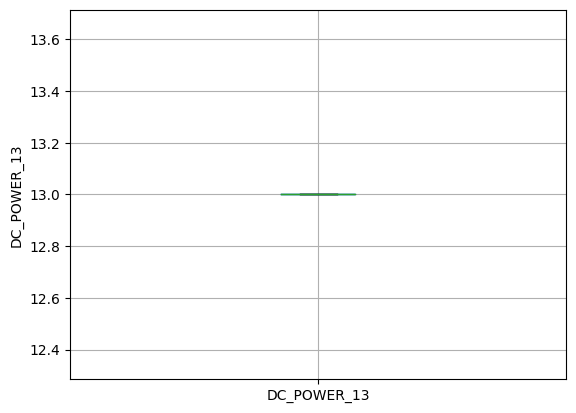

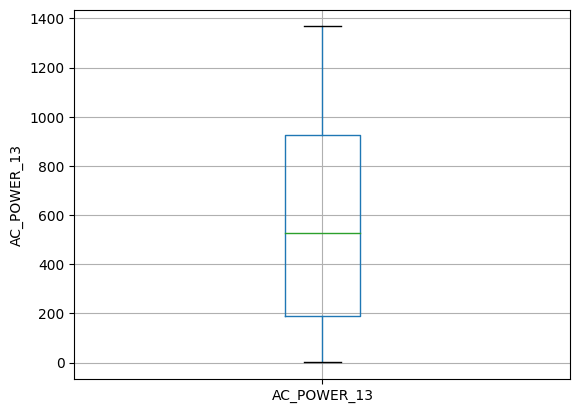

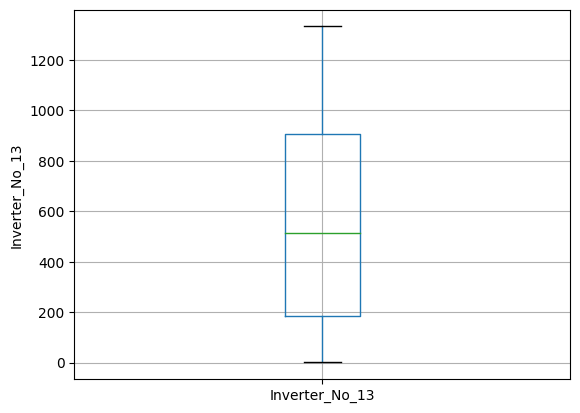

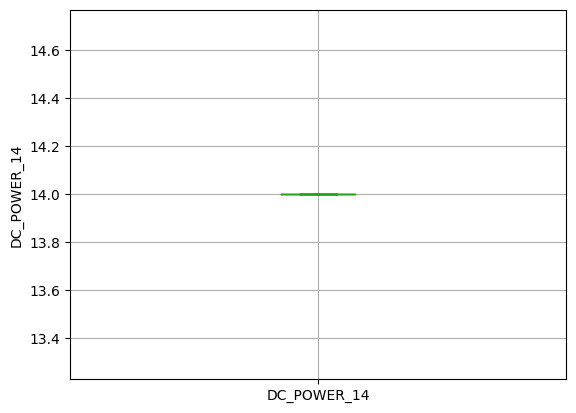

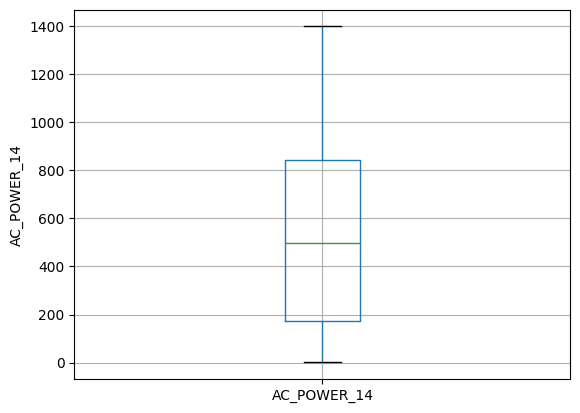

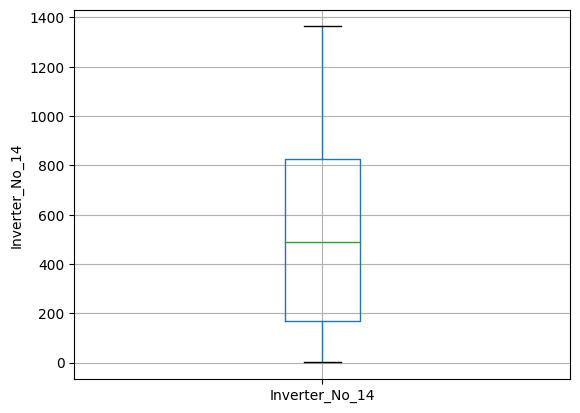

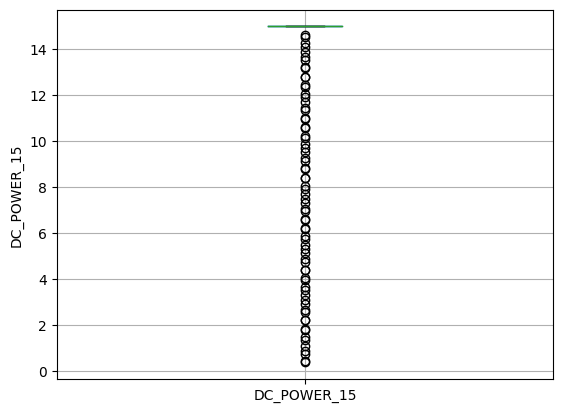

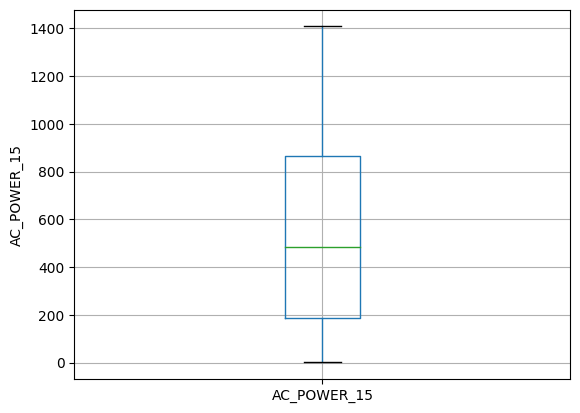

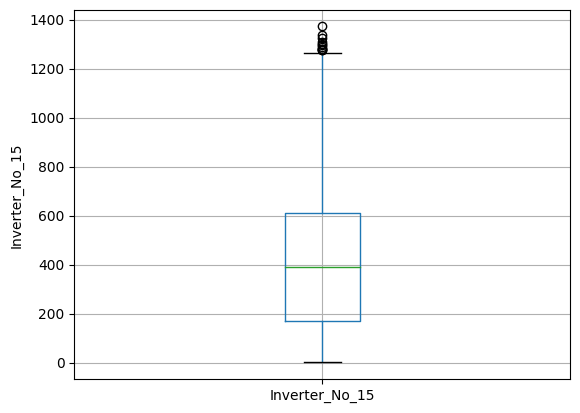

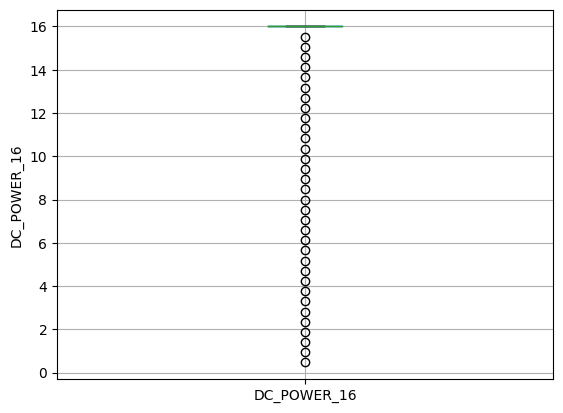

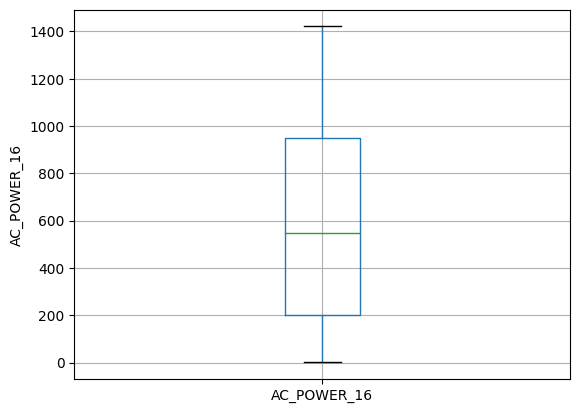

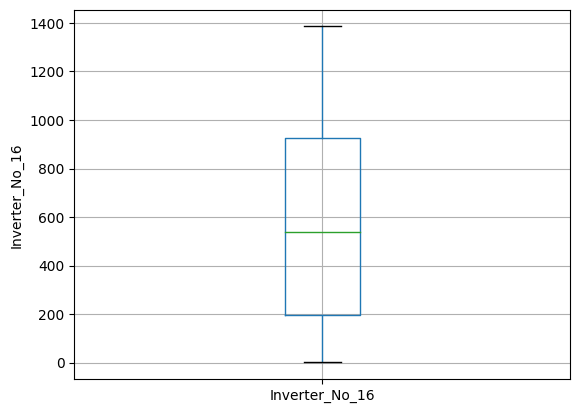

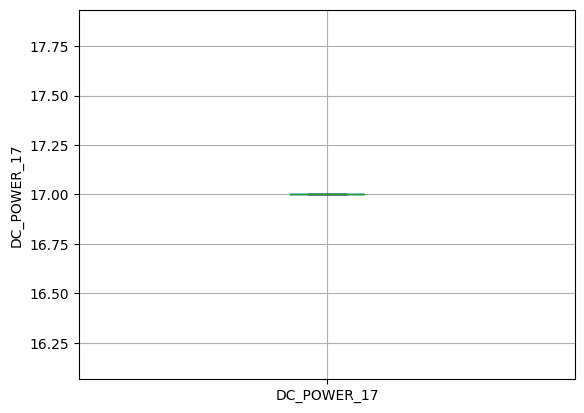

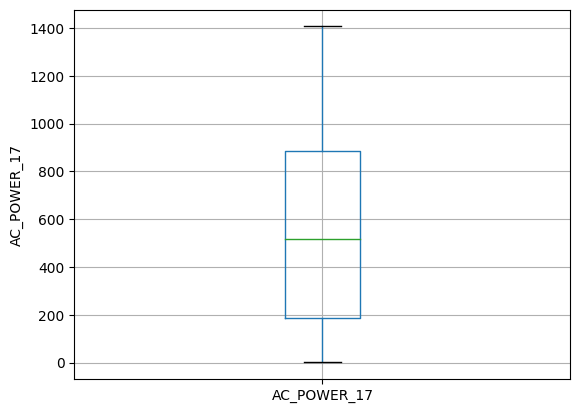

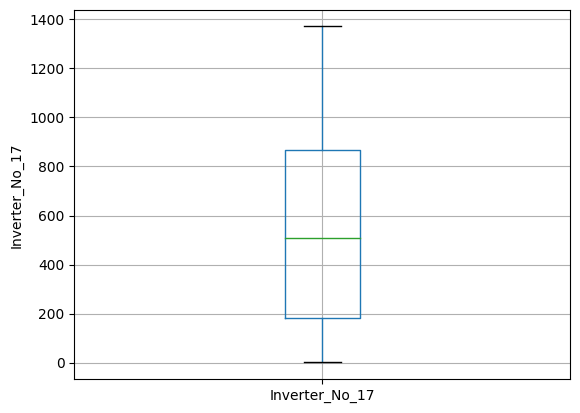

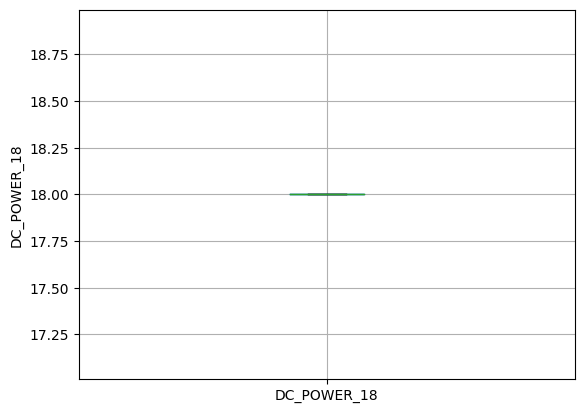

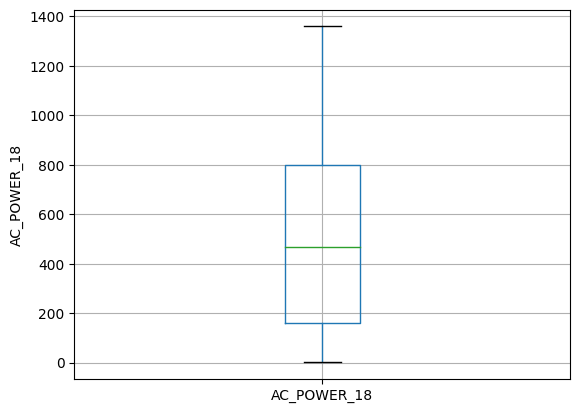

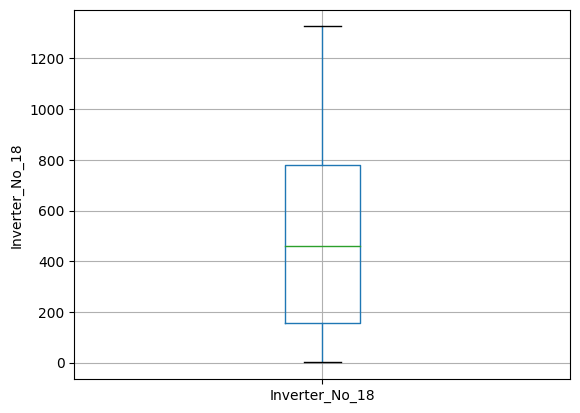

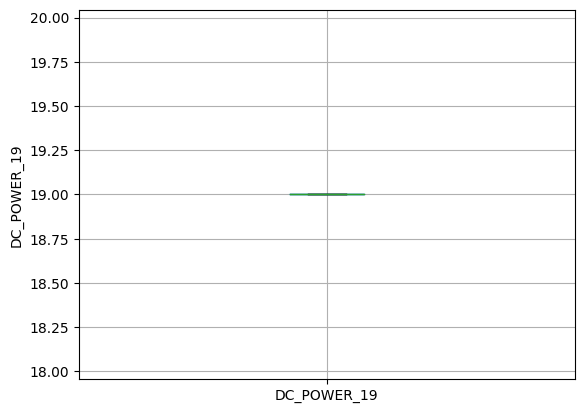

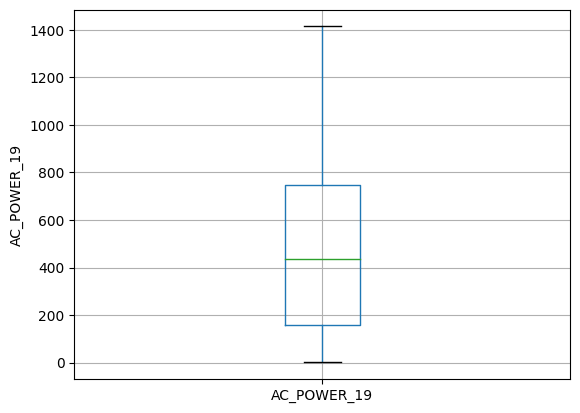

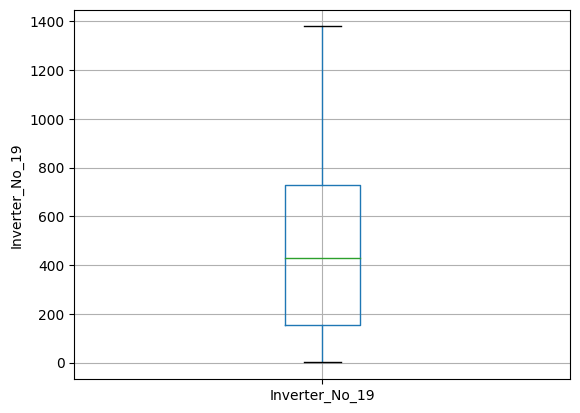

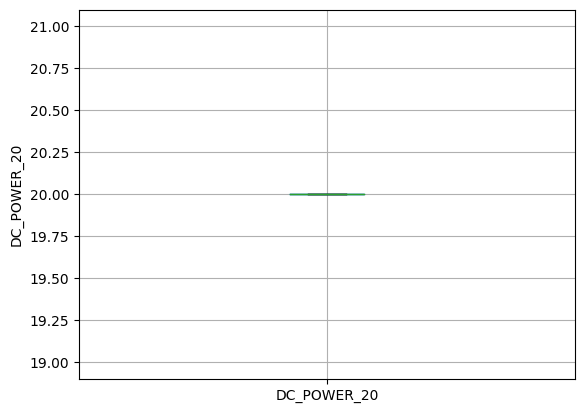

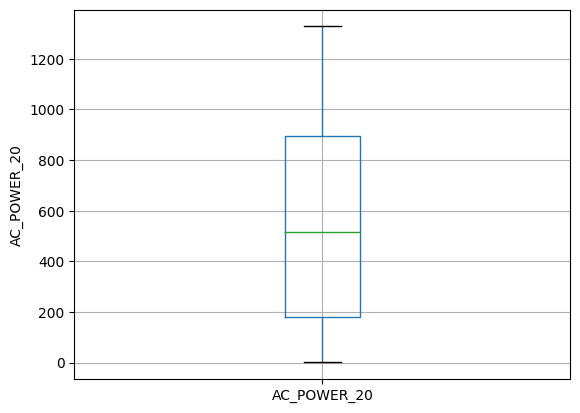

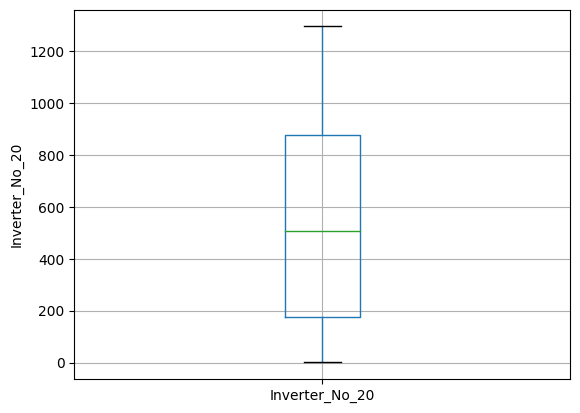

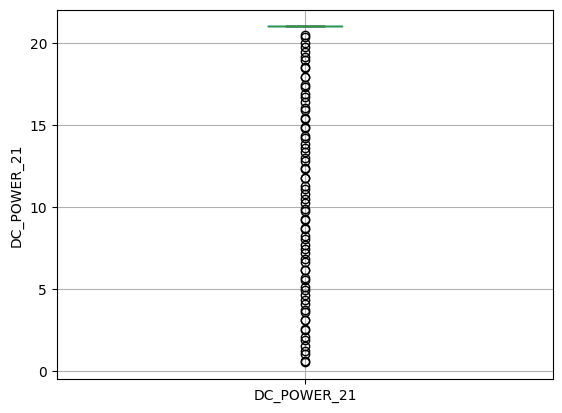

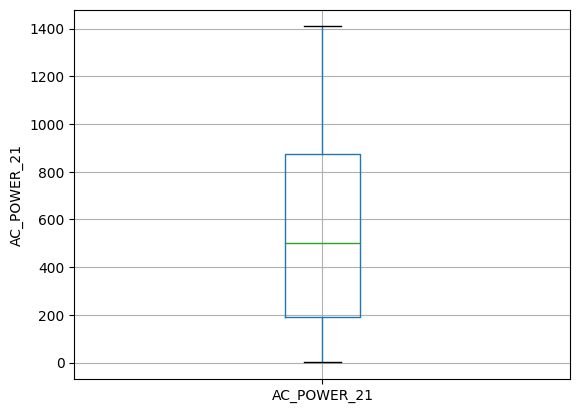

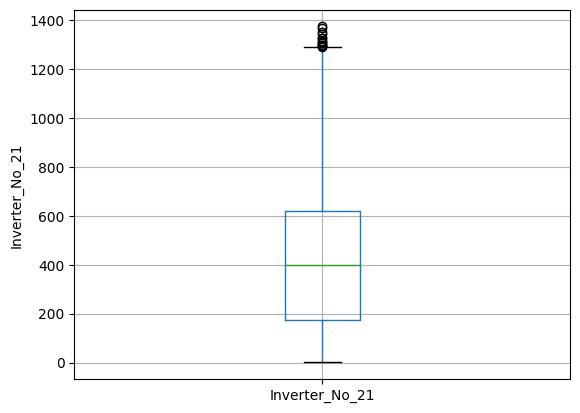

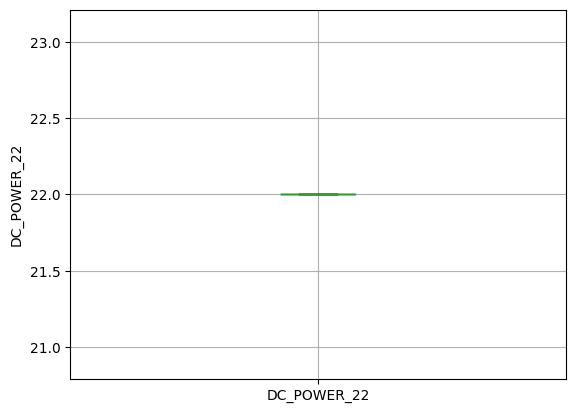

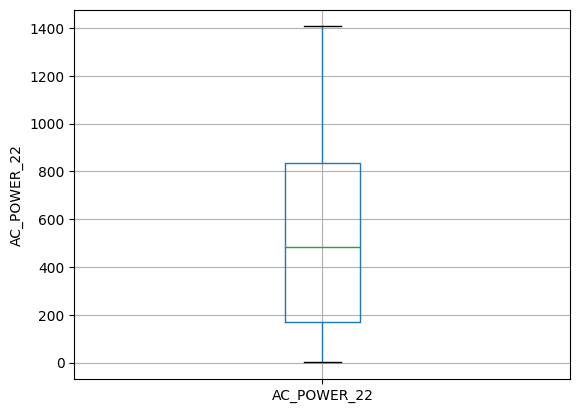

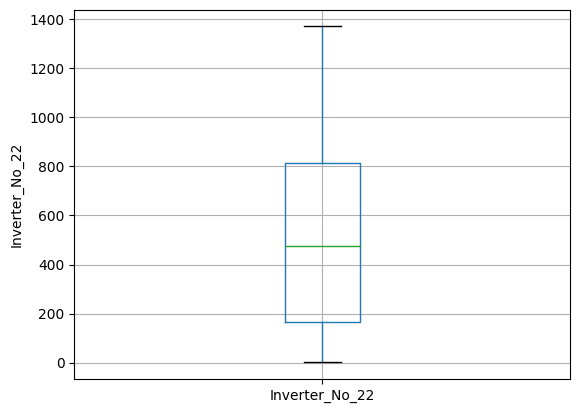

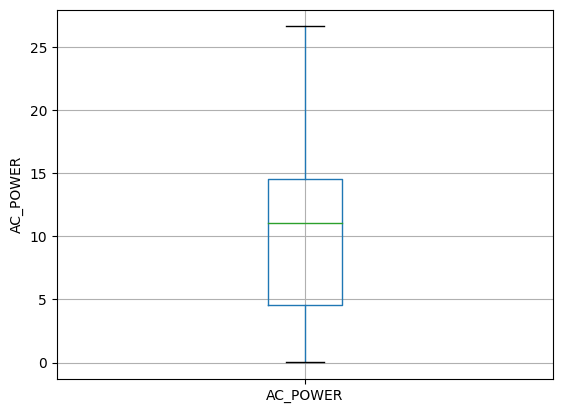

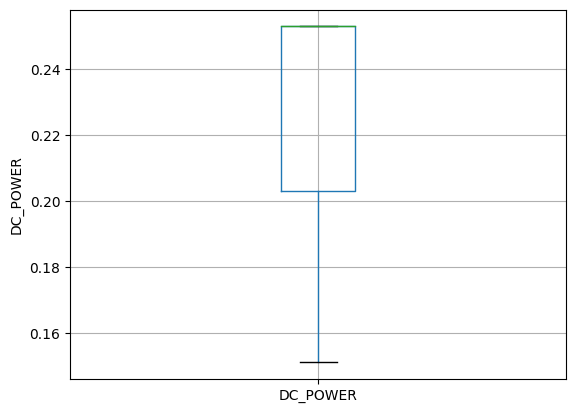

In [ ]:

for feature in df_train.columns[3:]:
    # ignoring zero values for plotting
    df_train[df_train[feature]!=0].boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

In [ ]:

df_train.drop('DC_POWER',axis=1,inplace=True)
percentile_dict = {}
for i in df_train.columns[3:]:
    a_list = []
    for j in [1,10,25,50,75,90,99,100]:
        a_list.append(round(np.percentile(df_train[i],j),2))
    percentile_dict[i] = a_list
pd.DataFrame(pd.concat([pd.DataFrame({'Percentiles':[1,10,25,50,75,90,99,100]}),pd.DataFrame(percentile_dict)],axis=1))

<ipython-input-12-f814c291f713>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('DC_POWER',axis=1,inplace=True)


,Percentiles,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,...,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER
0,1,22.55,21.10,0.00,0.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
1,10,23.66,22.40,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
2,25,24.73,23.76,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
3,50,27.24,27.79,0.02,1.0,0.00,1.21,2.0,0.00,0.00,...,20.0,0.00,0.00,21.0,0.00,170.36,22.0,0.00,0.00,0.47
4,75,31.55,41.75,0.46,1.0,535.66,538.39,2.0,402.93,395.81,...,20.0,482.34,473.00,21.0,312.62,507.60,22.0,426.71,418.87,11.45
5,90,34.61,52.28,0.80,1.0,1024.51,1003.53,2.0,871.89,853.11,...,20.0,961.87,939.29,21.0,844.76,845.51,22.0,883.88,864.01,15.64
6,99,37.40,60.32,0.96,1.0,1313.71,1280.86,2.0,1265.76,1234.17,...,20.0,1289.11,1256.91,21.0,1280.58,1248.68,22.0,1254.15,1223.16,19.99
7,100,39.18,66.64,1.10,1.0,1419.84,1384.35,2.0,1382.21,1347.66,...,20.0,1327.49,1294.30,21.0,1408.86,1373.65,22.0,1406.17,1371.01,26.63


In [ ]:
outlier_imputer_dict = {}

for var in df_train.columns[3:]:
    percentile_dict = {}

    NinetyNine_percentile = np.percentile(df_train[var],99)

    First_percentile = np.percentile(df_train[var],1)

    percentile_dict['99th'] =  NinetyNine_percentile
    percentile_dict['1st'] =  First_percentile
    # Saving as dictionary for each column
    outlier_imputer_dict[var] = percentile_dict

#Saving the final dictionary
np.save('outlier_imputer_dict',outlier_imputer_dict)
def outlier_imputer(df):
    #Loading Outlier Imputer dictionary
    outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()

    for var in df.columns[3:]:

        df.loc[df[df[var] > outlier_dict[var]['99th']].index,var] = outlier_dict[var]['99th']

        df.loc[df[df[var] < outlier_dict[var]['1st']].index,var] = outlier_dict[var]['1st']

    return df

print(outlier_imputer_dict)

#Applying imputation on Train & Test
df_train = outlier_imputer(df_train)
df_test = outlier_imputer(df_test)

{'AMBIENT_TEMPERATURE': {'99th': 37.39861080172414, '1st': 22.546186481034482}, 'MODULE_TEMPERATURE': {'99th': 60.32299286206897, '1st': 21.099540196666666}, 'IRRADIATION': {'99th': 0.9607427385333338, '1st': 0.0}, 'DC_POWER_1': {'99th': 1.0, '1st': 0.0}, 'AC_POWER_1': {'99th': 1313.7053333333336, '1st': 0.0}, 'Inverter_No_1': {'99th': 1280.8573333333336, '1st': 0.0}, 'DC_POWER_2': {'99th': 2.0, '1st': 2.0}, 'AC_POWER_2': {'99th': 1265.7593333333336, '1st': 0.0}, 'Inverter_No_2': {'99th': 1234.1740000000002, '1st': 0.0}, 'DC_POWER_3': {'99th': 3.0, '1st': 3.0}, 'AC_POWER_3': {'99th': 1257.8207142857143, '1st': 0.0}, 'Inverter_No_3': {'99th': 1226.3635714285713, '1st': 0.0}, 'DC_POWER_4': {'99th': 4.0, '1st': 0.0}, 'AC_POWER_4': {'99th': 1152.2673333333337, '1st': 0.0}, 'Inverter_No_4': {'99th': 1124.6880000000006, '1st': 0.0}, 'DC_POWER_5': {'99th': 5.0, '1st': 0.0}, 'AC_POWER_5': {'99th': 1292.5068095238098, '1st': 0.0}, 'Inverter_No_5': {'99th': 1260.6280000000002, '1st': 0.0}, 'DC_P

KeyError: 'DC_POWER'

In [ ]:

#No. of bins
cut_blocks = [1,2,3,4,5,6,7,8]
#Bins range
cut_bins =[0, 12, 24, 36, 48, 60, 72, 84, 96]
#Assigning each row to a bin based on BLOCKS
df_train['BIN'] = pd.cut(df_train['BLOCK'], bins=cut_bins, labels = cut_blocks)
display(df_train)

<ipython-input-14-7377504ef455>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BIN'] = pd.cut(df_train['BLOCK'], bins=cut_bins, labels = cut_blocks)


,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER,BIN
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,92,2020-06-14,22:45,24.185657,22.922953,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2967,93,2020-06-14,23:00,24.412542,23.356136,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2968,94,2020-06-14,23:15,24.652915,23.913763,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2969,95,2020-06-14,23:30,24.702391,24.185130,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8


In [ ]:
# ANN Model ---------------------------------------------------------------------
#from keras.wrappers.scikit_learn import KerasRegressor
#from keras.models import Sequential
#from keras.layers import Dense

def ANN_model():
    # 3 layered Neural network with 500 epochs and 4 batch size
    reg = Sequential()
    reg.add(Dense(16, input_dim = 3, activation = 'relu'))
    reg.add(Dense(8,kernel_initializer='normal', activation = 'relu'))
    reg.add(Dense(1))
    reg.compile(loss='mean_squared_error', optimizer='adam')
    return reg

#ann_regressor = KerasRegressor(build_fn=ANN_model, nb_epoch=500, batch_size=4, verbose=False)

#-----------------------------------X---------------------------------------------------------
#Importing models & Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

## Pipeline for different Regression models
pipeline_lr = Pipeline([('lin_regression',LinearRegression())])
pipeline_dt = Pipeline([('dt_regression',DecisionTreeRegressor(random_state=0))])
pipeline_rf = Pipeline([('rf_regression',RandomForestRegressor(random_state=0))])
pipeline_ridge = Pipeline([('ridge_regression',Ridge(random_state=0))])
pipeline_lasso = Pipeline([('lasso_regression',Lasso(random_state=0))])
pipeline_xgboost = Pipeline([('xgboost_regression',XGBRegressor())])
#pipeline_ann = Pipeline([('ann_regressor',ann_regressor)])

## Making a list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_ridge, pipeline_lasso, pipeline_xgboost]

best_rmse = 100.0
best_regressor = 0
best_pipeline = ""

## Dictionary of Pipelines and Regressor types for ease of reference
pipe_dict = {0:'Linear Regression',1: 'Decision Tree Regressor',2:'Random Forest Regressor',
             3:'Ridge Regressor',4:'Lasso Regressor',5:'XG Boost Regressor'}

In [ ]:

import warnings
warnings.filterwarnings("ignore")

# features to be used for training
useful_features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

from sklearn.model_selection import StratifiedKFold
# Splitting data into 8 folds
skf = StratifiedKFold(n_splits=8, random_state=23, shuffle=True)
#Initializing kfold column
df_train['kfold'] = -1

# each row shall be assigned a fold no.based on 8 bins so that each fold will have equal representation of each bin
for fold,(train_indices, valid_indices) in enumerate(skf.split(X=df_train.iloc[:,:-1], y=df_train['BIN'])):
    df_train.loc[valid_indices, 'kfold'] = fold

# Will iterate through all the Pipelines one by one
for j, model in enumerate(pipelines):

    RMSE = list()
    for i in range(8):
        xtrain = df_train[df_train['kfold'] != i]
        xvalid = df_train[df_train['kfold'] == i]

        ytrain = xtrain.AC_POWER
        yvalid = xvalid.AC_POWER

        xtrain = xtrain[useful_features]
        xvalid = xvalid[useful_features]

        scaler = StandardScaler()
        scaler.fit_transform(xtrain)
        scaler.transform(xvalid)

        model.fit(xtrain, ytrain)
        rmse = np.sqrt(mean_squared_error(yvalid, model.predict(xvalid)))
        RMSE.append(rmse)

    # Mean of RMSE for all iterations for each model
    folds_mean_rmse = np.mean(RMSE)

    print('Mean Validation RMSE for {}: {}'.format(pipe_dict[j], folds_mean_rmse))

   # If mean of RMSE for all iterations reduces, call that model as the best & keep repeating
    # to get the best model
    if folds_mean_rmse < best_rmse:
        best_rmse = folds_mean_rmse
        best_pipeline = model
        best_regressor = j

print('\n\nRegressor with least RMSE:  {}'.format(pipe_dict[best_regressor]))
print(best_pipeline)

Mean Validation RMSE for Linear Regression: 2.4182262818288747
Mean Validation RMSE for Decision Tree Regressor: 2.4196451042060945
Mean Validation RMSE for Random Forest Regressor: 1.7736530243919693
Mean Validation RMSE for Ridge Regressor: 2.4218927280336895
Mean Validation RMSE for Lasso Regressor: 2.845610546911787
Mean Validation RMSE for XG Boost Regressor: 1.9339339113854443


Regressor with least RMSE:  Random Forest Regressor
Pipeline(steps=[('rf_regression', RandomForestRegressor(random_state=0))])


In [ ]:
#Splitting train into x & y
x_train = df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y_train = df_train[['AC_POWER']]

# Random grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['squared_error']  # Updated from 'mse' to 'squared_error'
}


from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(x_train, y_train)

# Best parameters found in Random Search
print(rf_randomcv.best_params_)

rf_model = RandomForestRegressor(n_estimators=1000,
                                 min_samples_split=2,
                                 min_samples_leaf=8,
                                 max_features='auto',
                                 max_depth=1000,
                                 criterion='squared_error')  # Correct criterion here
# Fitting on train set
rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 1000, 'criterion': 'squared_error'}


RandomForestRegressor(max_depth=1000, max_features='auto', min_samples_leaf=8,
                      n_estimators=1000)

In [ ]:
#Splitting into train and test
x_test = df_test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y_test = df_test[['AC_POWER']]

#Predicting for x_test
y_pred_rf = rf_model.predict(x_test)

print(f'Root Mean Squared Error for Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}')


Root Mean Squared Error for Test Data: 1.9135216279588392


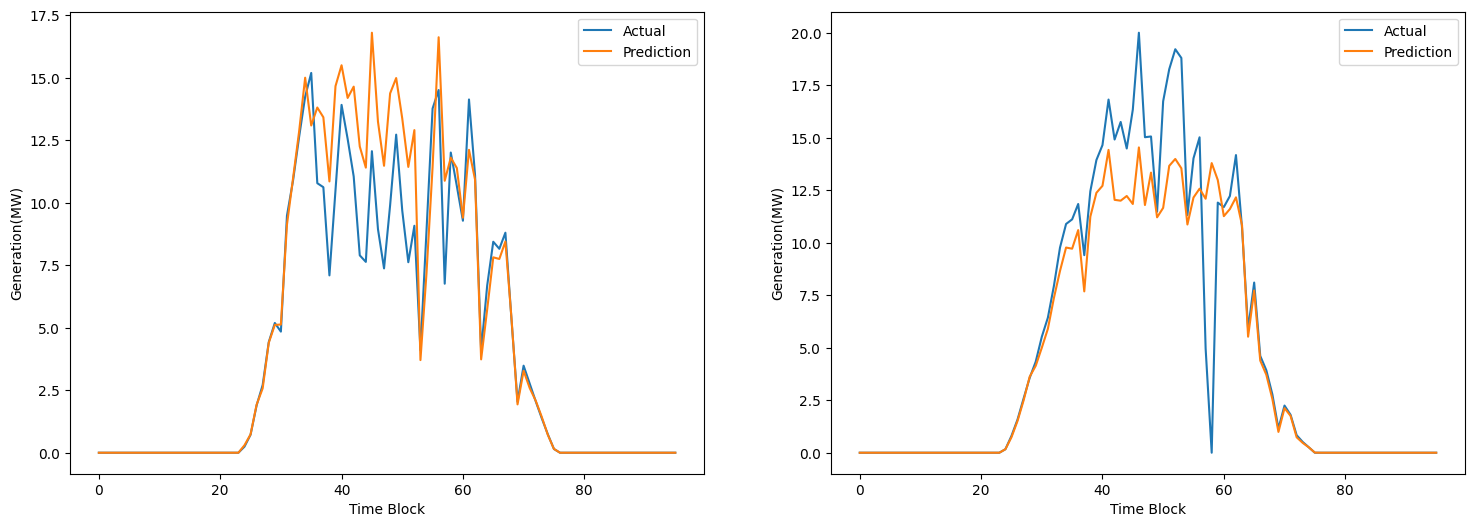

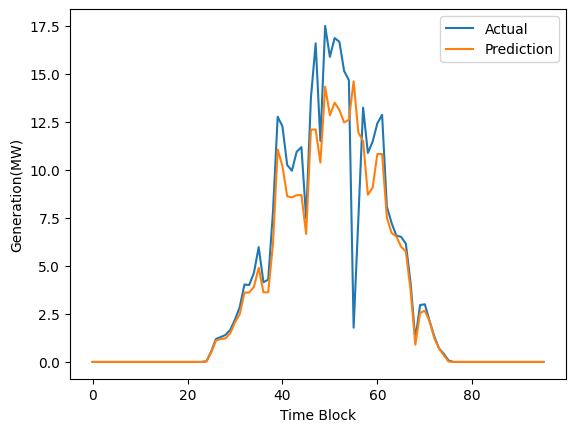

In [ ]:
# Creating actual_vs_pred DataFrame
actual_vs_pred = pd.DataFrame({
    'Actual(MW)': y_test.squeeze(),  # Assuming y_test is a DataFrame with a single column
    'Prediction(MW)': y_pred_rf
})

# For Plot 1
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# Day 1
ax1.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][0:96].reset_index(drop=True))
ax2.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][96:96*2].reset_index(drop=True))
ax1.set_xlabel('Time Block')
ax1.set_ylabel('Generation(MW)')
# Day 2
ax2.set_xlabel('Time Block')
ax2.set_ylabel('Generation(MW)')
ax1.legend(['Actual','Prediction'])
plt.legend(['Actual','Prediction'])
plt.show()
# Day 3
plt.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][96*2:96*3].reset_index(drop=True))
plt.xlabel('Time Block')
plt.ylabel('Generation(MW)')
plt.legend(['Actual','Prediction'])
plt.show();

Epoch 1/100
335/335 [==============================] - 6s 6ms/step - loss: 20.8167 - val_loss: 7.6627
Epoch 2/100
335/335 [==============================] - 1s 3ms/step - loss: 8.7161 - val_loss: 2.9503
Epoch 3/100
335/335 [==============================] - 1s 3ms/step - loss: 7.3409 - val_loss: 2.8944
Epoch 4/100
335/335 [==============================] - 1s 4ms/step - loss: 6.8699 - val_loss: 2.7517
Epoch 5/100
335/335 [==============================] - 1s 4ms/step - loss: 6.3462 - val_loss: 2.9591
Epoch 6/100
335/335 [==============================] - 1s 3ms/step - loss: 5.9461 - val_loss: 2.9187
Epoch 7/100
335/335 [==============================] - 1s 3ms/step - loss: 5.7298 - val_loss: 2.6807
Epoch 8/100
335/335 [==============================] - 1s 3ms/step - loss: 5.2737 - val_loss: 2.7399
Epoch 9/100
335/335 [==============================] - 1s 3ms/step - loss: 5.3773 - val_loss: 2.8625
Epoch 10/100
335/335 [==============================] - 1s 3ms/step - loss: 5.3055 - val_l

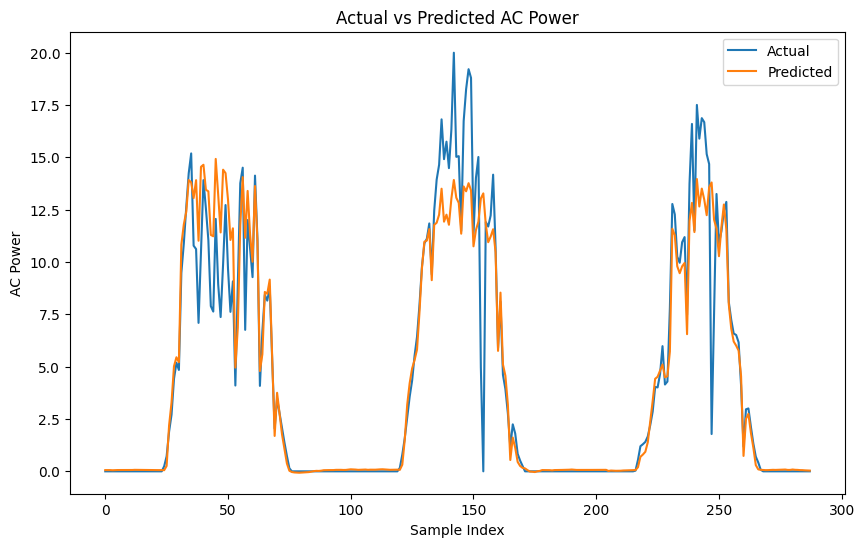

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization


# Preparing the training data
x_train = df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].values
y_train = df_train[['AC_POWER']].values

# Normalize features for training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# More complex ANN architecture
model = Sequential()
model.add(Dense(256, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model with a refined learning rate
adam = Adam(learning_rate=0.0005)
model.compile(loss='mean_squared_error', optimizer=adam)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping
model.fit(x_train_scaled, y_train, epochs=100, batch_size=8,
          validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Preparing the test data
x_test = df_test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].values
y_test = df_test[['AC_POWER']].values

# Normalize features for test data (use the same scaler as for the training data)
x_test_scaled = scaler.transform(x_test)

# Make predictions
y_pred = model.predict(x_test_scaled)

# Creating a DataFrame for plotting results
results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

# Calculate RMSE for evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error for Test Data: {rmse}")

# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual'], label='Actual')
plt.plot(results_df['Predicted'], label='Predicted')
plt.title('Actual vs Predicted AC Power')
plt.xlabel('Sample Index')
plt.ylabel('AC Power')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit

# Let's assume df_train and df_test are your pre-processed dataframes

# Select features and target
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'AC_POWER'

# Normalize features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_train[features])
df_train_scaled = scaler.transform(df_train[features])
df_test_scaled = scaler.transform(df_test[features])

# Function to reshape data into sequences
def create_sequences(input_data, output_data, n_steps):
    X, y = [], []
    for i in range(len(input_data) - n_steps):
        X.append(input_data[i:i + n_steps])
        y.append(output_data[i + n_steps])
    return np.array(X), np.array(y)

# Determine the range of `n_steps` to test
n_steps_range = [1, 2, 3, 4, 6, 8, 12, 24]

# Initialize variables to store the optimum model's details
best_n_steps = None
lowest_rmse = float('inf')

# Train and evaluate models for each `n_steps`
for n_steps in n_steps_range:
    # Generate sequences
    X, y = create_sequences(df_train_scaled, df_train[target].values, n_steps)

    # TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    cv_rmse = []

    for train_index, val_index in tscv.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Define the LSTM model
        model = Sequential()
        model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, X.shape[2])))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Fit the model
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0,
                  validation_data=(X_val, y_val), callbacks=[early_stopping])

        # Predict and evaluate
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        cv_rmse.append(rmse)

    # Calculate the average RMSE over all folds
    average_rmse = np.mean(cv_rmse)

    # Update the best `n_steps` value if the current model performs better
    if average_rmse < lowest_rmse:
        lowest_rmse = average_rmse
        best_n_steps = n_steps

# Print the best `n_steps`
print(f'Best n_steps: {best_n_steps} with RMSE: {lowest_rmse}')

# You could then use the best_n_steps to train the final model or test it further.


16/16 [==============================] - 0s 4ms/step
Best n_steps: 6 with RMSE: 2.4326778839154635


Epoch 1/50
334/334 [==============================] - 10s 9ms/step - loss: 5.8658 - val_loss: 5.4465
Epoch 2/50
334/334 [==============================] - 2s 7ms/step - loss: 3.2600 - val_loss: 5.2793
Epoch 3/50
334/334 [==============================] - 1s 4ms/step - loss: 3.0753 - val_loss: 4.9253
Epoch 4/50
334/334 [==============================] - 1s 4ms/step - loss: 2.9646 - val_loss: 5.7137
Epoch 5/50
334/334 [==============================] - 1s 4ms/step - loss: 2.9122 - val_loss: 5.0787
Epoch 6/50
334/334 [==============================] - 2s 6ms/step - loss: 2.9023 - val_loss: 5.1823
Epoch 7/50
334/334 [==============================] - 2s 5ms/step - loss: 2.8244 - val_loss: 5.5173
Epoch 8/50
9/9 [==============================] - 0s 3ms/step
Root Mean Squared Error for Test Data: 2.0393132301355075


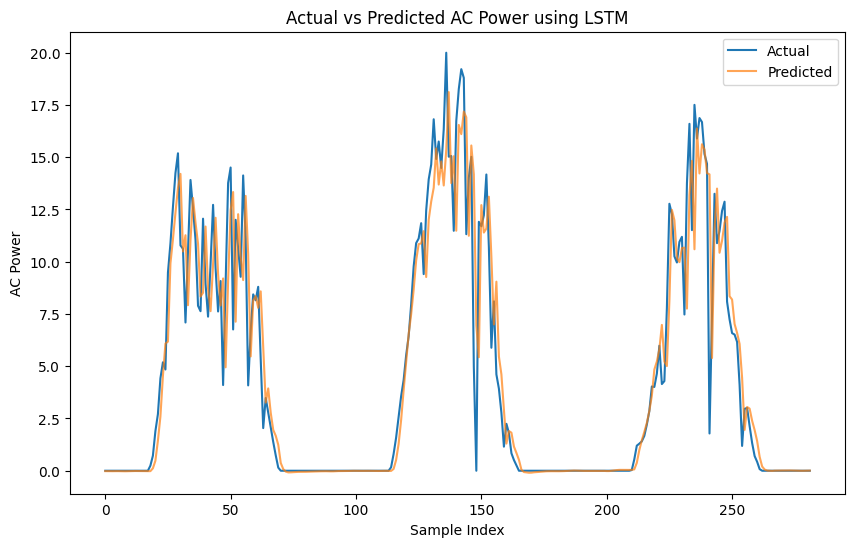

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_train and df_test are already defined and preprocessed
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'AC_POWER'

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[features])
df_train_scaled = scaler.transform(df_train[features])
df_test_scaled = scaler.transform(df_test[features])

# Convert to sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, :])  # sequence of data
        y.append(data[i, -1])  # corresponding target
    return np.array(X), np.array(y)

n_steps = 6  # example sequence length
X_train, y_train = create_sequences(np.hstack((df_train_scaled, df_train[[target]].values)), n_steps)
X_test, y_test = create_sequences(np.hstack((df_test_scaled, df_test[[target]].values)), n_steps)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Predicting with LSTM
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error for Test Data: {rmse}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted AC Power using LSTM')
plt.xlabel('Sample Index')
plt.ylabel('AC Power')
plt.legend()
plt.show()
